<a href="https://colab.research.google.com/github/samanthavp/cfg-python-finalproject/blob/master/CFG_Object_Recognition_Team_Indigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Pre-processing: augmentation transformations
train = ImageDataGenerator(
    rotation_range=20,      # randomly rotate the image within +/- 20 degrees
    width_shift_range=0.1,  # randomly shift the image horizontally within +/- 10%
    height_shift_range=0.1, # randomly shift the image vertically within +/- 10%
    shear_range=0.2,        # randomly apply shearing transformation
    zoom_range=0.2,         # randomly zoom the image within +/- 20%
    horizontal_flip=True,   # randomly flip the image horizontally
    fill_mode='nearest',    # fill any missing pixels with the nearest pixel value
    rescale = 1/255
)

In [ ]:
#Pull our handmade datasets from our local directory
train_dataset = train.flow_from_directory('/content/drive/My Drive/CFG/Object_recognition_images/train/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = "categorical")

val_dataset = val.flow_from_directory('/content/drive/My Drive/CFG/Object_recognition_images/validation/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = "categorical")

Found 245 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
#Create the model and its layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (200, 200, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Unfreeze the top 4 layers of model and continues training the model over the course of the epochs
for layer in model.layers[-4:]:
    layer.trainable = True

In [ ]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#Fit the model
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 10, #how many times the dataset will be processed by the model
                      validation_data = val_dataset)

Epoch 1/10
3/3 [==============================] - 5s 1s/step - loss: 1.4975 - accuracy: 0.5556 - val_loss: 2.4437 - val_accuracy: 0.2400
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 1.9779 - accuracy: 0.2222 - val_loss: 2.3698 - val_accuracy: 0.3600
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 1.8338 - accuracy: 0.4444 - val_loss: 2.5295 - val_accuracy: 0.4400
Epoch 4/10
3/3 [==============================] - 4s 2s/step - loss: 1.8372 - accuracy: 0.4444 - val_loss: 2.6899 - val_accuracy: 0.4000
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 2.3565 - accuracy: 0.3333 - val_loss: 2.5336 - val_accuracy: 0.3600
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 1.6714 - accuracy: 0.5556 - val_loss: 2.3837 - val_accuracy: 0.3400
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 1.7400 - accuracy: 0.3333 - val_loss: 2.2732 - val_accuracy: 0.3600
Epoch 8/10
3/3 [=========================

In [ ]:
#Save the model
model.save('object.recognition')

model = tf.keras.models.load_model('object.recognition')

loss, accuracy = model.evaluate(val_dataset)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

17/17 [==============================] - 1s 51ms/step - loss: 2.4866 - accuracy: 0.3600
Loss:  2.486570119857788
Accuracy:  0.36000001430511475


In [ ]:
val_dataset.class_indices

{'USB stick': 0,
 'computer keyboard': 1,
 'computer mouse': 2,
 'keys': 3,
 'laptop': 4,
 'magnifying glass': 5,
 'phone': 6,
 'router': 7,
 'satellite dish': 8,
 'server rack': 9}

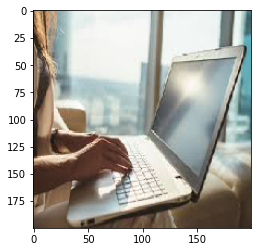

1/1 [==============================] - 0s 188ms/step
router


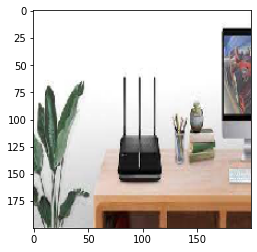

1/1 [==============================] - 0s 71ms/step
router


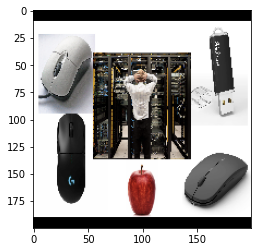

1/1 [==============================] - 0s 79ms/step
server rack


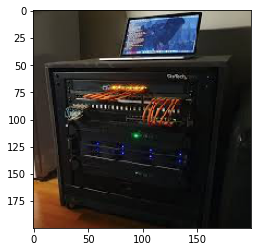

1/1 [==============================] - 0s 75ms/step
phone


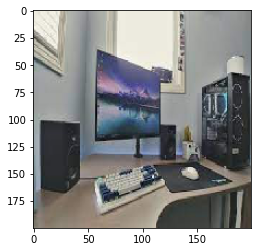

1/1 [==============================] - 0s 89ms/step
router


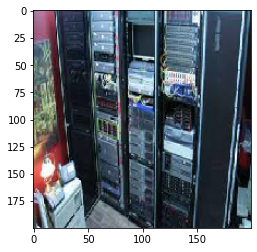

1/1 [==============================] - 0s 73ms/step
server rack


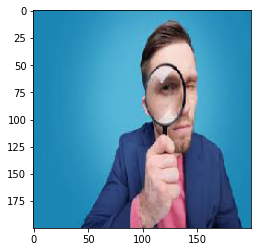

1/1 [==============================] - 0s 62ms/step
phone


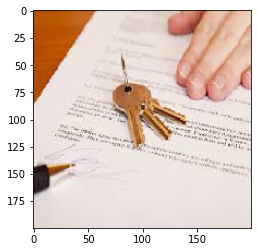

1/1 [==============================] - 0s 69ms/step
magnifying glass


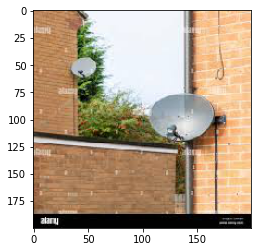

1/1 [==============================] - 0s 56ms/step
router


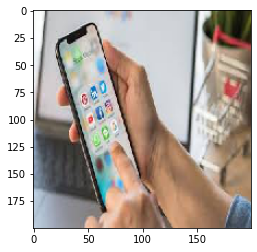

1/1 [==============================] - 0s 42ms/step
router


In [ ]:
# Test model with new images

dir_path = '/content/drive/My Drive/CFG/Object_recognition_images/test/'

# Define a list of class labels
class_labels = ['USB stick', 'computer keyboard', 'computer mouse', 'keys', 'laptop', 'magnifying glass', 'phone', 'router', 'satellite dish', 'server rack']

for i in os.listdir(dir_path):
  img = image.load_img(dir_path + i, target_size=(200, 200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])
  value = model.predict(images)

  # Find the index of the maximum value in the array
  predicted_class_idx = np.argmax(value)

  # Look up the corresponding class label
  predicted_class_label = class_labels[predicted_class_idx]

  print(predicted_class_label)
  
